### Cleaning Highschool Survey Data



In [2]:
import pandas as pd

#NYC School Survery Import (HSS): 
RespRate = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 0)

#High Schools At a Glance Import (HSAAG): 
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

 
# HSAAG - Keep columns of interest
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# HSAAG - Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals

schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# HSAAG - Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')

# HSS - Keep columns of interest
RespRate.columns = ['DBN','School Name', 'Parent RR','Teacher RR','Student RR','Collab. Teachers','School Leadership',
                   'Rig. Instruction','Fam-Community Ties', 'Supportive Envment.','Trust','Parent PS',
                   'Student PS', 'Teacher PS']
RespRate_cols = ['DBN','Parent RR','Collab. Teachers','School Leadership','Rig. Instruction','Fam-Community Ties', 
                 'Supportive Envment.','Trust','Parent PS','Student PS']
schools2 = RespRate[RespRate_cols]

# Combine HSAAG and HSS by joining with School DBN as index 
schoolsN = schoolsDF.join(schools2.set_index('DBN'),how = 'inner')

# Convert all non-strings to floats for easier processing 
schoolsN = schoolsN.apply(lambda x: pd.to_numeric(x,errors='ignore'))

schoolsN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 01M292 to 32K556
Data columns (total 17 columns):
Borough                     438 non-null object
Number of Programs          438 non-null int64
Neighborhood                438 non-null object
Graduation Rate             438 non-null float64
Attendance Rate             438 non-null float64
% students who feel safe    438 non-null float64
AP Courses y/n              438 non-null int64
CTE y/n                     438 non-null int64
Parent RR                   438 non-null float64
Collab. Teachers            438 non-null float64
School Leadership           438 non-null float64
Rig. Instruction            438 non-null float64
Fam-Community Ties          438 non-null float64
Supportive Envment.         438 non-null float64
Trust                       438 non-null float64
Parent PS                   436 non-null float64
Student PS                  438 non-null float64
dtypes: float64(12), int64(3), object(2)
memory usage: 61.6+ KB


C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

### Exploratory Data Analysis

#### 1. Correlation Matrix of Dataframe Columns

                          Number of Programs  Graduation Rate  \
Number of Programs                  1.000000         0.104687   
Graduation Rate                     0.104687         1.000000   
Attendance Rate                     0.018476         0.388747   
% students who feel safe           -0.158478         0.163138   
Parent RR                          -0.167997         0.054890   
Fam-Community Ties                 -0.210615        -0.024965   
Trust                              -0.146249         0.024204   
Student PS                         -0.179234         0.147536   

                          Attendance Rate  % students who feel safe  \
Number of Programs               0.018476                 -0.158478   
Graduation Rate                  0.388747                  0.163138   
Attendance Rate                  1.000000                  0.287862   
% students who feel safe         0.287862                  1.000000   
Parent RR                        0.200776                  

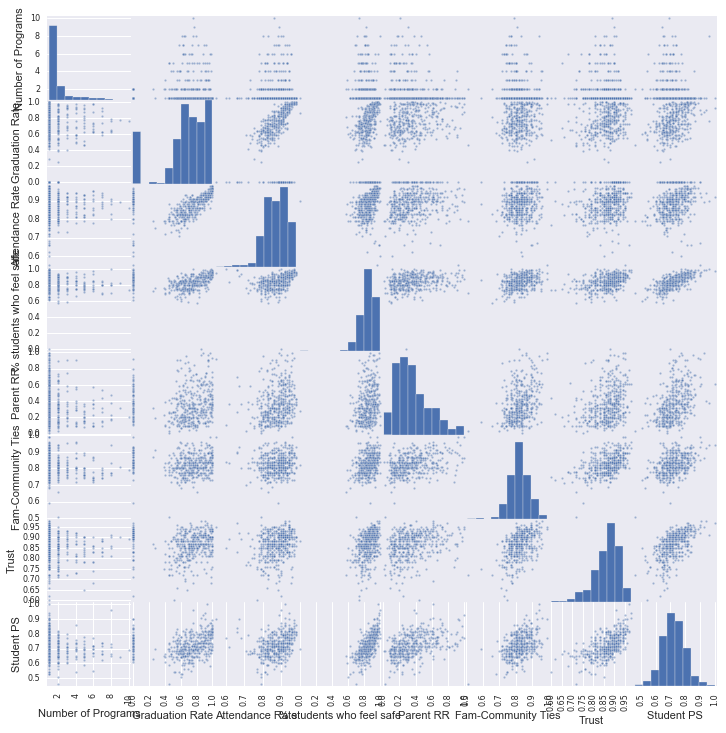

In [139]:
#cols2 = ['Number of Programs','Graduation Rate','Attendance Rate','% students who feel safe','Parent RR', 'Fam-Community Ties','Trust','Student PS']
cols3 = [0,1,3,4,5,8,12,14,16]
print(schoolsN[cols3].corr())
pd.scatter_matrix(schoolsN[cols3],figsize=(12, 12), diagonal='hist');

From the correlation and scatter matrices above, here are the most highly correlated variables (>0.30):

1. Percent Satisfaction: Student and % Students Who Feel Safe (0.625)
2. Percent Satisfaction: Trust and Percent Satisfaction: Student (0.605)
3. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Trust (0.497)
4. Percent Satisfaction: Student and Total Parent Response Rate (0.468)
5. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Student (0.438)
6. Graduation Rate and Attendance Rate (0.389)
7. Percent Satisfaction: Strong Family-Community Ties and Total Parent Response Rate (0.380)
8. Percent Satisfaction: Trust and % Students Who Feel Safe (0.348)
9. Percent Satisfaction: Strong Family-Community Ties and % Students Who Feel Safe (0.313)



#### 2. Descriptive Statistics

In [140]:
schoolsN[cols3].describe()

,Number of Programs,Graduation Rate,Attendance Rate,% students who feel safe,Parent RR,Fam-Community Ties,Trust,Student PS
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,1.762557,0.656895,0.870822,0.842991,0.359338,0.823196,0.863744,0.720457
std,1.596124,0.291114,0.063280,0.090275,0.207963,0.059273,0.062255,0.075210
min,1.000000,0.000000,0.550000,0.000000,0.010000,0.510000,0.600000,0.460000
25%,1.000000,0.580000,0.830000,0.790000,0.200000,0.780000,0.830000,0.670000
50%,1.000000,0.720000,0.880000,0.850000,0.310000,0.820000,0.870000,0.720000
75%,2.000000,0.870000,0.920000,0.910000,0.470000,0.860000,0.910000,0.770000
max,10.000000,1.000000,0.980000,1.000000,0.990000,0.990000,0.980000,1.000000


The descriptive statistics above show that some of the variables have high standard deviations, such as Number of Programs, Graduation Rate, and Total Parent Response Rate. Additionally, the mean Percent Satisfaction for the three educational elements we're interested in range from 72.0-82.3% with relatively low standard deviations (0.059-0.075). However, the ranges of these percentages are fairly high (with both low minimums and high maximums) and show some promise for analysis of why some schools yielded such low percentages.


#### 3. Relationship of variables to borough/neighborhood

To determine if trends vary across neighborhoods (neighborhoods with less than three schools are excluded from the analysis) and/or boroughs, the data is grouped by 'Neighborhood' and 'Borough.' The average Percent satisfaction for all six survery categories is plotted in a stacked bar graph to look for variability among neighborhoods and boroughs. 



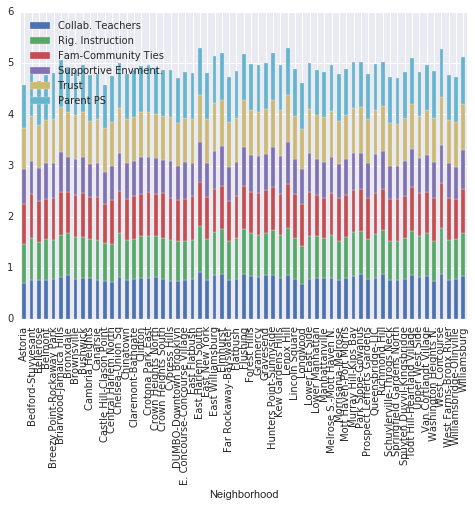

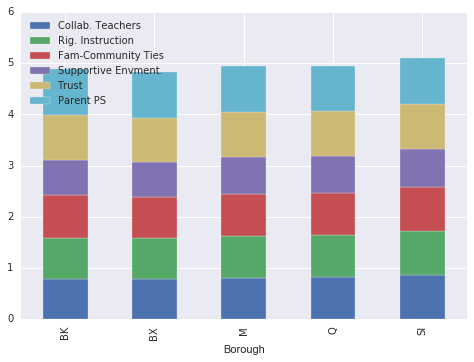

In [322]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set()

#[Borough                     438 non-null object
#Number of Programs          438 non-null int64
#Neighborhood                438 non-null object
#Graduation Rate             438 non-null float64
#Attendance Rate             438 non-null float64
#% students who feel safe    438 non-null float64
#AP Courses y/n              438 non-null int64
#CTE y/n                     438 non-null int64
#Parent RR                   438 non-null float64
#Collab. Teachers            438 non-null float64
#School Leadership           438 non-null float64
#Rig. Instruction            438 non-null float64
#Fam-Community Ties          438 non-null float64
#Supportive Envment.         438 non-null float64
#Trust                       438 non-null float64
#Parent PS                   436 non-null float64
#Student PS                  438 non-null float64]

#Groupby Neighborhood in order to filter out groups smaller than 3
schoolsHood = schoolsN.groupby(['Neighborhood']).filter(lambda g: len(g) >= 3)

#Make df grouped by Neighboorhood (only Neighbors w/ >= 3 schools)
schools_ByHood = schoolsHood.groupby(['Neighborhood']).mean()

#Make stacked bar-graph using the GroupBy object 
dfplt = schools_ByHood[[7,9,10,11,12,13]]
dfplt.plot.bar(stacked=True)
#Make scatter plot matrix with cmap = Neighborhood
#dfplt = schoolsHood[[2,8,9,10,11,12,13,14]]
#pal = sns.palplot(sns.color_palette("husl", len(schools_ByHood)))
#sns.pairplot(dfplt,kind="scatter",hue = 'Neighborhood',palette =pal)

# Make df grouped by Borough
schools_ByBorough = schoolsHood.groupby(['Borough']).mean()

#Make stacked bar-graph using the GroupBy object 
dfplt = schools_ByBorough[[7,9,10,11,12,13]]
dfplt.plot.bar(stacked=True)
#Make scatter plot matrix with cmap = Neighborhood
#dfplt = schoolsN[[0,8,9,10,11,12,13,14]]
#pal = sns.palplot(sns.color_palette("husl", len(schools_ByBorough)))
#sns.pairplot(dfplt,kind="scatter",hue = 'Borough',palette =pal)

**(Might just get rid of the stacked barplots)** Neighborhoods, which make up the 6 different Boroughs, appear to be more variable in their percent satisfaction than the Boroughs. And all neighborhoods and boroughs appear to have the lowest satisfaction in Supportive Environment category. However, this exploratory analysis is limited by the small range of average percentage satifaction rates. 

Therefore, data columns were normalized to highlight cells which are above and below the average percent satisfaction rates. First, the variables are split between School Statistics (ie: graduation rate, attendance rate, etc), and Survey Results (ie: Percent Satisfaction: Rigorous Instruction). Pivot tables of the dataframe grouped by Neighborhood or Borough were created to allow heatmaps to be easily created in seaborn. The heatmaps show the data which was normalized column-wise and sorted by Parent Response Rate (Parent RR). 

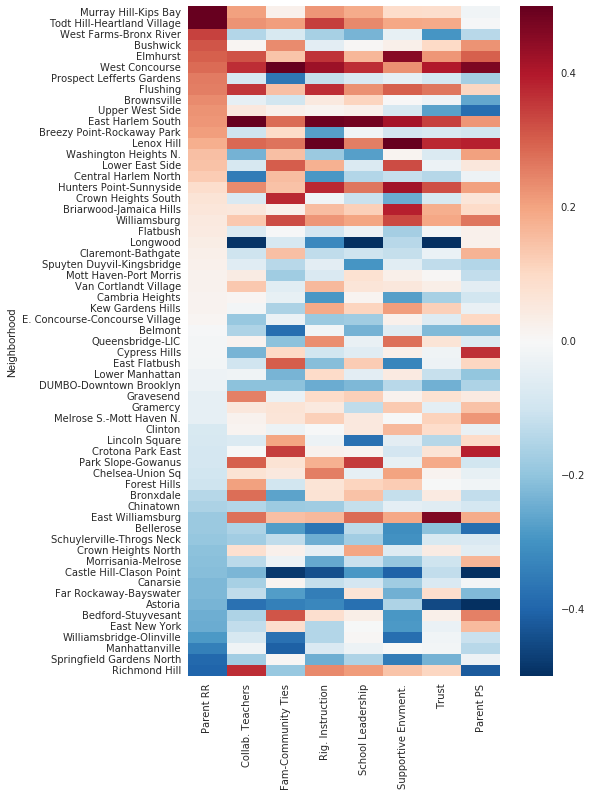

In [317]:
import numpy as np
dfplt = schoolsHood[[2,8,9,10,11,12,13,14,15]]
dfplt2 = pd.pivot_table(dfplt,index = ['Neighborhood'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = ['Parent RR','Collab. Teachers','Fam-Community Ties','Rig. Instruction',
                                    'School Leadership','Supportive Envment.','Trust','Parent PS']
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [7,12]
plt.figure(1)
sns.set_context('notebook',font_scale=1)
sns.heatmap(dfplt3,vmin=-.5,vmax=.5)


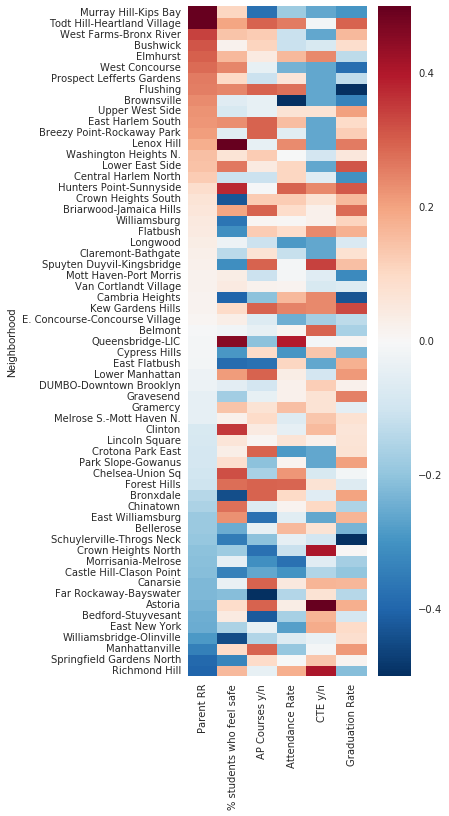

In [318]:
dfplt = schoolsHood[[2,3,4,5,6,7,8]]
dfplt2 = pd.pivot_table(dfplt,index = ['Neighborhood'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = cols[-1:]+cols[:-1]
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [4,12]
plt.figure(1)
sns.set_context('notebook',font_scale=1)
sns.heatmap(dfplt3,vmin=-.5,vmax=.5)


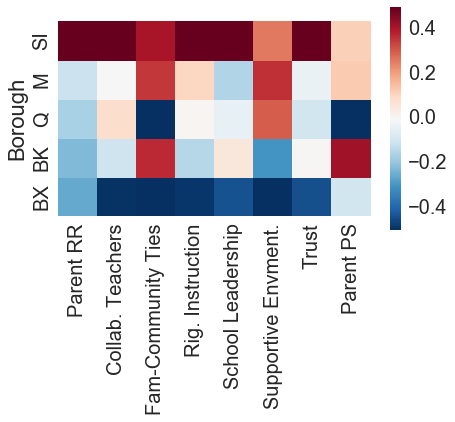

In [319]:
dfplt = schoolsN[[0,8,9,10,11,12,13,14,15]]
dfplt2 = pd.pivot_table(dfplt,index = ['Borough'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = ['Parent RR','Collab. Teachers','Fam-Community Ties','Rig. Instruction',
                                    'School Leadership','Supportive Envment.','Trust','Parent PS']
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [7,4]
plt.figure(1)
sns.set_context('notebook',font_scale=2)
sns.heatmap(dfplt3,square=True,vmin=-.5,vmax=.5)


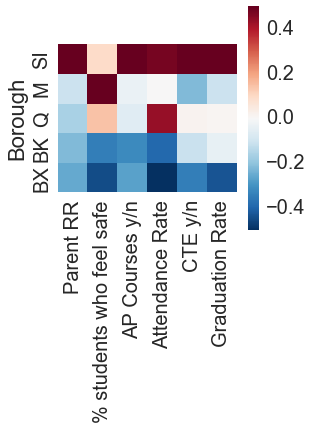

In [320]:
dfplt = schoolsN[[0,3,4,5,6,7,8]]
dfplt2 = pd.pivot_table(dfplt,index = ['Borough'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = cols[-1:]+cols[:-1]
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [4,4]
plt.figure(1)
sns.set_context('notebook',font_scale=2)
sns.heatmap(dfplt3,square=True,vmin=-.5,vmax=.5)

Visually, it appears that neighboorhoods and boroughs with a lower Parent Response Rate (RR) also score lower in percent satisfaction of many categories, especially "Supportive Environment." For individual neighborhoods, "Trust" and "Collaborative Teachers" seem to be less correlated to Parent RR. The Percent of Students Who Feel Safe seems to be more correlated to Parent RR than Graduation Rate or Attendance Rate. Also, interestingly, whether CTE programs are offered seems to be inversely related to Parent RR when grouped by Neighborhoods. Looking only at boroughs, Statten Island (SI) stands out more from the other buroughs. While there does not seem to be a strong trend between Percent Satisfaction and borough, there does seem to be a strong trend between School Statistics and borough, suggesting that parents are more concerned with more nuanced measures of school environment rather than the liklihood of their student to graduate or attend class, or the types of programs offered at the school. 

#### 4. Preliminary clustering

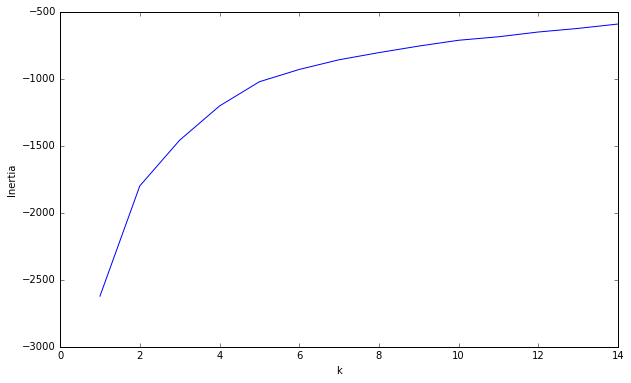

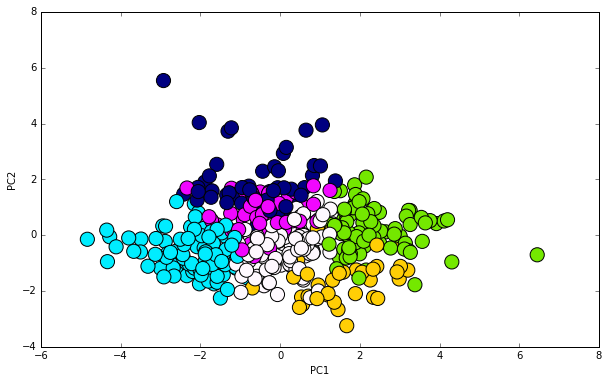

In [31]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Scale the dataset, find PCA and transform coordinates
schoolsScaled = scale(schoolsN[cols3])

PCAmodel = PCA()
schoolsPCA = PCAmodel.fit_transform(schoolsScaled)

# create a new pandas dataframe 

PCAdf = pd.DataFrame(schoolsPCA, index=schoolsN.index,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
PCAcols = ['PC1','PC2','PC3','PC4']
score = []
k = []

# clustering for k = 1 to k = 15
#for i in range(1,15):
 #   model = KMeans(n_clusters=i)
#  model.fit_predict(PCAdf[PCAcols])
 #   score.append(model.score(PCAdf[PCAcols]))
#  k.append(i)

plt.plot(k, score)
plt.ylabel('Inertia')
plt.xlabel('k')
plt.show()

# k = 6
km_model = KMeans(n_clusters=6)
km_fit = km_model.fit_predict(PCAdf[PCAcols])

plt.scatter(PCAdf['PC1'],PCAdf['PC2'],c=km_fit,cmap='gist_ncar',s=200)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()